# What are the most demanded skills for the top 3 most popular data roles?

### Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Calculate skill percentage
4. Plot final findings

In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
#convert the string list in the job skills column to a list
df["job_skills"] = df["job_skills"].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_US = df[df["job_country"] == "United States"]

In [7]:
df_skills = df_US.explode("job_skills")

In [11]:
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()

df_skills_count = df_skills_count.reset_index(name="skill_count")

df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)

In [35]:
job_titles = df_skills_count["job_title_short"].unique().tolist()

job_titles = sorted(job_titles[:3])

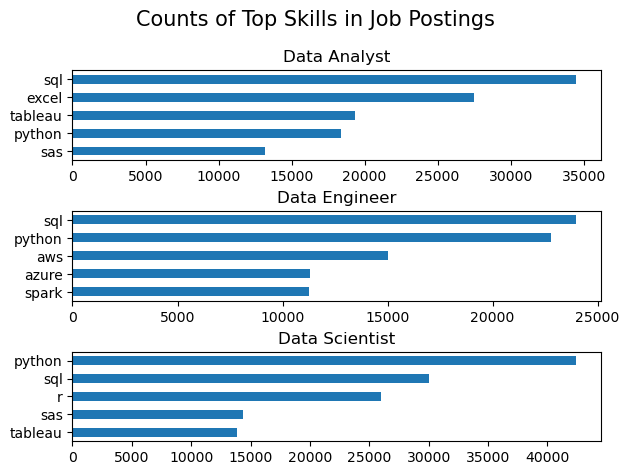

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

#get the index and the value of the list of the top 3 job titles based on size/count and then make a variable that sorts by each job title, get the top 5 skills from that, and plot it in a bar chart
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot[::-1].plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title, legend=False)
    ax[i].set_ylabel("")

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()

In [28]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")

In [33]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")

df_skills_percent["skill_percent"] = 100 * df_skills_percent["skill_count"] / df_skills_percent["jobs_total"]

df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


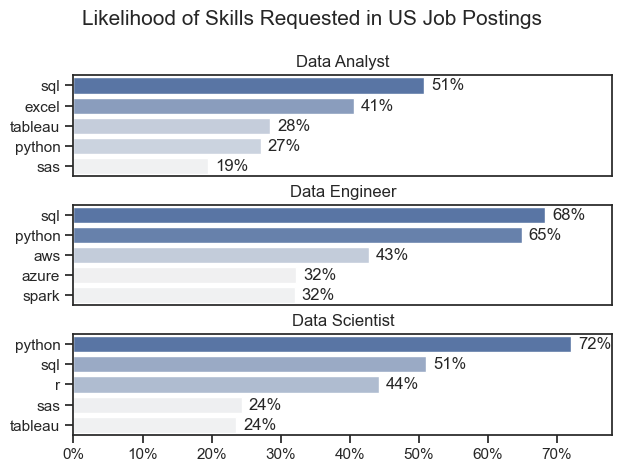

In [54]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style="ticks")

#get the index and the value of the list of the top 3 job titles based on size/count and then make a variable that sorts by each job title, get the top 5 skills from that, and plot it in a bar chart
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent["job_title_short"] == job_title].head(5)
    #df_plot[::-1].plot(kind="barh", x="job_skills", y="skill_percent", ax=ax[i], title=job_title, legend=False)
    sns.barplot(data=df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_count", palette="light:b", legend=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_xlim(0, 78)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))

    for n, value in enumerate(df_plot["skill_percent"]):
        #:.0f is 0 decimal points and a floating point
        ax[i].text(value + 1, n, f"{value:.0f}%", va="center")
    
    #if the index is any number besides 2, then remove the x label
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()